# Assignement 2

### <span style="color:chocolate"> Submission requirements </span>

Your homework will not be graded if your notebook doesn't include output. In other words, <span style="color:red"> make sure to rerun your notebook before submitting to Gradescope </span> (Note: if you are using Google Colab: go to Edit > Notebook Settings  and uncheck Omit code cell output when saving this notebook, otherwise the output is not printed).

Additional points may be deducted if these requirements are not met:
    
* Comment your code;
* Each graph should have a title, labels for each axis, and (if needed) a legend. Each graph should be understandable on its own;
* Try and minimize the use of the global namespace (meaning, keep things inside functions).
---

### Import libraries

In [425]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

We imported our libraries

In [426]:
def create_1d_data(num_examples, w, b, bound):
  """Create X, Y data with a linear relationship with added noise.

  Args:
    num_examples: number of examples to generate
    w: desired slope
    b: desired intercept
    bound: lower and upper boundary of the data interval

  Returns:
    X and Y with shape (num_examples)
  """
  np.random.seed(4)  # consistent random number generation
  X = np.arange(num_examples)
  deltas = np.random.uniform(low=-bound, high=bound, size=X.shape) # added noise
  Y = b + deltas + w * X

  return X, Y

---
### Step 1: Data ingestion

Created a function that makes random data

Let's start by creating some artificial data using the <span style="color:chocolate">create_1d_data()</span> function defined at the top of the notebook.

In [427]:
# Define parameters
num_examples = 70
w = 2
b = 1
bound = 1

# Create data
X, Y = create_1d_data(num_examples, w, b, bound)

# Print shapes
print('Printing shape of X:', X.shape)
print('Printing first 10 elements in X:', X[:10])
print('\nPrinting shape of Y:', Y.shape)
print('Printing first 10 elements in Y:', Y[:10])

Printing shape of X: (70,)
Printing first 10 elements in X: [0 1 2 3 4 5 6 7 8 9]

Printing shape of Y: (70,)
Printing first 10 elements in Y: [ 1.93405968  3.0944645   5.94536872  7.42963199  9.39545765 10.43217899
 13.95254891 14.01246051 16.50596472 18.86958306]


---
### Step 2: Data Preprocessing

Create data from function we made

Our objectives here involve adding one more feature to X and creating data partitions.

### <span style="color:chocolate">Exercise 1:</span> Adding features (10 points) 

1. Add a column of $1s$ to $X$ (this will serve as an intercept or "bias" in our modeling task later on). Note: do not create a new array, just concatenate with the current values;
2. Print the shape of the array.

In [428]:
new_col = np.ones((70,1)) # This is a NumPy function that creates an array filled with ones. Creates a 2D array with 70 rows and 1 column.

X = np.hstack((X.reshape(-1,1),new_col)) # Method that changes the shape of the array without changing its data.

print(X.shape)

(70, 2)


make an array of only ones
then turn our horizontal array containing the x data we made previously into a 2d array by reshaping it and apending the array of ones we just created
then printed out the shape (it has 70 rows and 2 columns seconds being only 1's)

### <span style="color:chocolate">Exercise 2:</span> Data splits (10 points)

Using the <span style="color:chocolate">train_test_split()</span> method available in scikit-learn:
1. Split the (X,Y) data into training and test paritions by setting test_size=0.2 and random_state=1234. All the other arguments of the method are set to default values. Name the resulting arrays X_train, X_test, Y_train, Y_test;
2. Print the shape of each array.

In [429]:
#Call function ans store it in variables
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1234)

#print shape of variables
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(56, 2)
(14, 2)
(56,)
(14,)


---
### Step 3: Exploratory data analysis (EDA)

We called the train_test_split function to split our datasets and stored them into their coresponding variables then printed their shapes

things to note x is our input withits associated weight
y is our output answers to check if our prediction is correct

### <span style="color:chocolate">Exercise 3:</span> Plots (10 points)

Create a side-by-side histogram for the values in Y_train and X_train. Make sure to include axes name and titles for each subplot.

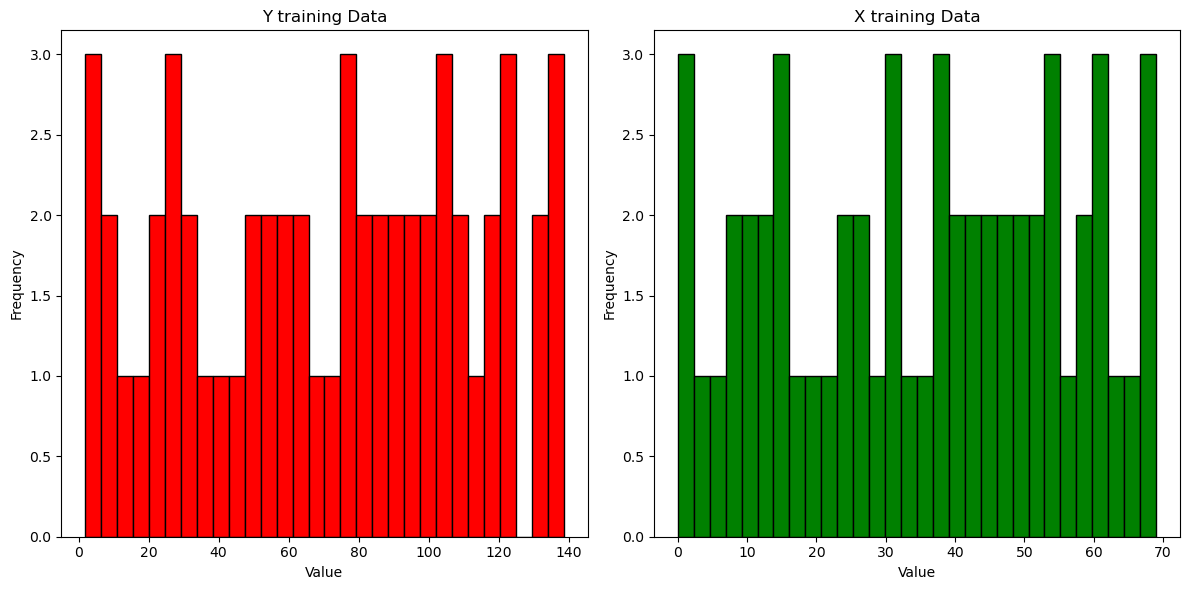

In [430]:
import matplotlib.pyplot as plt

X_train_first_col = X_train[:,0]

#create a figure that has 2 graphs
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

#first graph
ax1.hist(Y_train, bins=30, edgecolor='black', color='red')
ax1.set_title('Y training Data')
ax1.set_xlabel('Value')
ax1.set_ylabel('Frequency')

#second graph
ax2.hist(X_train_first_col, bins=30, edgecolor='black', color= 'green')
ax2.set_title('X training Data')
ax2.set_xlabel('Value')
ax2.set_ylabel('Frequency')

#make sure graphs do not overlap and show graph
plt.tight_layout()
plt.show()

Created a figure with 2 histograms on for the y training data and the other for the x training data 

---
### Step 4: Modeling

Let's start by considering the two models proposed in Assignment 1:
1. $M_1(x) = 5+x$ 
2. $M_2(x) = 1+2x$

### <span style="color:chocolate">Exercise 4:</span> Practice with Parameters (10 points)

Perform the following computations:

1. Use matrix multiplication (np.dot) to create $M_1$ and $M_2$ (as previously defined) to produce vectors of predictions using the X_train data. Call these predictions M1_hat_train, M2_hat_train. Hint: the "learned" parameters are alredy provided to you;
3. Print the shapes of the predictions to verify that they match the shape of Y_train.

In [431]:
#reshape Y_train
Y_train = Y_train.reshape(-1,1)
Y_test = Y_test.reshape(-1,1)

#define weight vectors and store them in a 2d arraydd
w_M1 = np.array([5,1]).reshape(-1,1)
w_M2 = np.array([2,1]).reshape(-1,1)

#Dot Multiplicaiton
M1_hat_train = np.dot(X_train, w_M1)
M2_hat_train = np.dot(X_train, w_M2)

#printing out shapes
print("shape of M1_hat_train is: ", M1_hat_train.shape)
print("shape of M2_hat_train is: ", M2_hat_train.shape)
print("shape of Y_train is: ", Y_train.shape)

shape of M1_hat_train is:  (56, 1)
shape of M2_hat_train is:  (56, 1)
shape of Y_train is:  (56, 1)


frist we reshaped our y data arrays into 2d arrays. then we made a 2d array for our weights, then we dot multiplied them with our x data and stored that into a new array. We then printed its shape

### <span style="color:chocolate">Exercise 5:</span> Learn parameters with Gradient Descent (20 points)

1. Fill in the <span style="color:green">NotImplemented</span> parts of the <span style="color:chocolate">gradient_descent()</span> function below. Hint: refer to ``02 Linear Regression_helper.ipynb file``;

2. Run this function with our artificial (X_train, Y_train) data . Set learning_rate = .0002 and num_epochs = 5. Print out the weights and loss after each epoch. 

3. Generate a plot with the loss values on the y-axis and the epoch number on the x-axis for visualization. Make sure to include axes name and title.

In [432]:
def gradient_descent(inputs, outputs, learning_rate, num_epochs):
  """Apply the gradient descent algorithm to learn learn linear regression.

  Args:
    inputs: A 2-D array where each column is an input feature and each
            row is a training example.
    outputs: A 1-D array containing the real-valued
             label corresponding to the input data in the same row.
    learning_rate: The learning rate to use for updates.
    num_epochs: The number of passes through the full training data.

  Returns:
    weights: A 2-D array with the learned weights after each training epoch.
    losses: A 1-D array with the loss after each epoch.
  """
  # m = number of examples, n = number of features
  m, n = inputs.shape
  
  # We'll use a vector of size n to store the learned weights and initialize
  # all weights to 1. 
  W = np.ones((n,1))
    
  # Keep track of the training loss and weights after each step.
  losses = []
  weights = []
  
  for epoch in range(num_epochs):
    # Append the old weights to the weights list to keep track of them.
    weights.append(W)

    # Evaluate the current predictions for the training examples given
    # the current estimate of W (you did this in exercise 5). 
    predictions = inputs.dot(W)
      
    # Find the difference between the predictions and the actual target
    # values.
    diff = predictions - outputs
      
    # In standard linear regression, we want to minimize the sum of squared
    # differences. Compute the mean squared error loss. Don't bother with the
    # 1/2 scaling factor here.
    loss = np.sum(diff ** 2)/ (2 * m)
      
    # Append the loss to the losses list to keep a track of it.
    losses.append(loss)
    
    # Compute the gradient with respect to the loss.
    # [Formula (4) in the Gradient Descent Implementation]
    #2 divided by number of rows in X training data, transpose the X_training data to predorm dot multiplication against the diffrence "error"
 
    gradient = (1 / m) * inputs.T.dot(diff)
      
    # Update weights, scaling the gradient by the learning rate.
    W = W - learning_rate * gradient
      
  return np.array(weights), np.array(losses)

In [433]:
print(gradient_descent(X_train, Y_train, learning_rate = .0002, num_epochs = 5 ))

(array([[[1.        ],
        [1.        ]],

       [[1.33262886],
        [1.00709394]],

       [[1.55469157],
        [1.01183193]],

       [[1.7029404 ],
        [1.01499708]],

       [[1.80191116],
        [1.01711221]]]), array([832.68333043, 371.20743313, 165.53286312,  73.86604146,
        33.01117932]))


What we did:

Step 1
    make a 2d array for weights, we set these weights to 1's

Step 2
    Run it and get our initial predictions

Step 3
    See how close our initial predictions were to the actual value, we do this by subtracting our test data values from our prediction

Step 4 
    Calculate the MSE by squaring all the losses then adding them up together then dividing by the total number of values

Step 5
    Gradient decent: We will divide 2 by the number of rows in our training data then multiply it by the dot product of transposed training datta by the loss (prediction - actuial values)

---
### Step 5: Hyperparameter tuning

Hyperparameter tuning plays an important role in optimizing ML models. One systematically adjusts hyperparameters to find the right balance between model complexity and generalization, ultimately leading to better predictive performance and model effectiveness.

Note that hyperparameter tuning is typically performed on **a separate validation dataset**. However, for the purposes of this assignment and based on the ML knowledge you've acquired thus far, we will perform hyperparameter tuning directly on the training data.

### <span style="color:chocolate">Exercise 6:</span> Tuning hyperparameters (10 points)

Answer the following questions:
    
1. Do you think it would be beneficial to extend the model training in Exercise 5 by increasing the learning rate to 0.02? Justify your answer;

2. Restoring to the previous learning_rate = .0002, would you  consider extending the model training in Exercise 5 by increasing the number of epochs to 10? Justify your answer.

Note: to support your answers, we recommend the following actions:
- create side-by-side subplots to show the loss at each epoch (make sure to include axes name and title), and
- print the loss at the last epoch under the following scenarios:
    - learning_rate=.0002, num_epochs=5;
    - learning_rate=.02, num_epochs=5;
    - learning_rate=.0002, num_epochs=10.

1. Initially before plotting the loss of each learining rate/epoch I did believe increasing the learning rate would result in a better model because it would require less iterations however it causes us to overshoot

2. Yes increasing the number of epochs to 10 results in a smaller loss. with 10 epochs we get a loss of 0.739893341490536 as opposed to 33.01117931602222 when we run 5 epochs. Although we doubled the number of epochs the accuracy of the loss we obtain by doing so is more than doubled

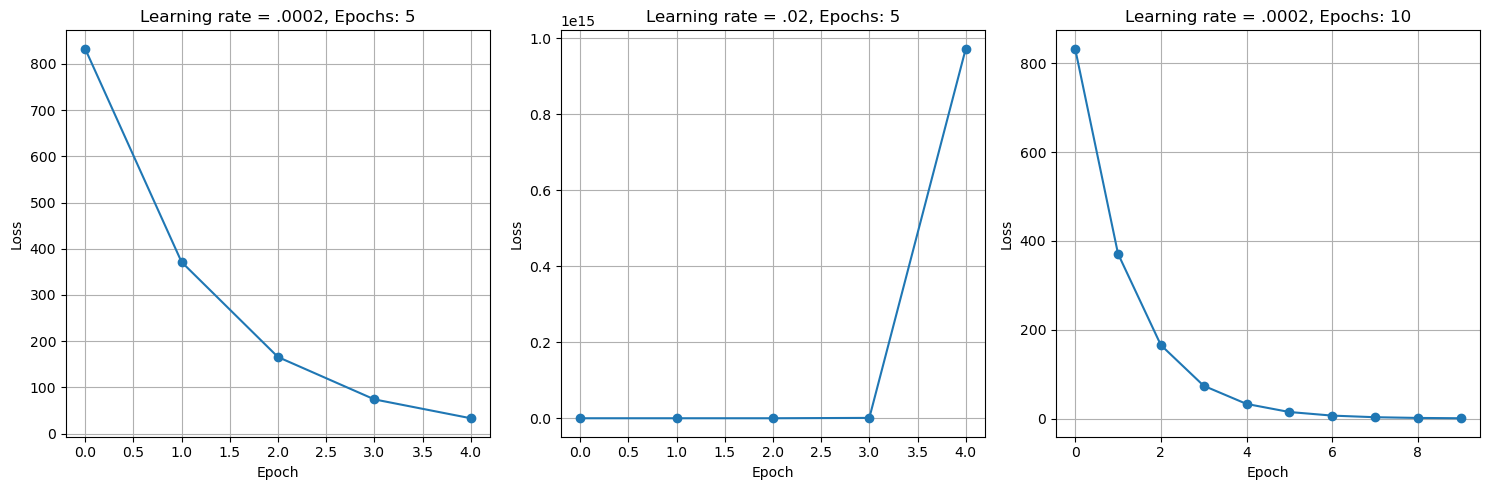

Loss at last epoch (learning_rate=0.0002, num_epochs=5): 33.01117931602222
Loss at last epoch (learning_rate=0.02, num_epochs=5): 971772202488257.2
Loss at last epoch (learning_rate=0.0002, num_epochs=10): 0.739893341490536


In [434]:
weights_0002_5, losses_0002_5 = gradient_descent(X_train, Y_train, learning_rate=0.0002, num_epochs=5)
weights_02_5, losses_02_5 = gradient_descent(X_train, Y_train, learning_rate=0.02, num_epochs=5)
weights_0002_10, losses_0002_10 = gradient_descent(X_train, Y_train, learning_rate=0.0002, num_epochs=10)

#titles for graphs
titles = [
    'Learning rate = .0002, Epochs: 5',
    'Learning rate = .02, Epochs: 5',
    'Learning rate = .0002, Epochs: 10'
]

loss_data = [
    losses_0002_5,
    losses_02_5,
    losses_0002_10
]


#create a figure that has 2 graphs
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, ax in enumerate(axs):
    ax.plot(loss_data[i], marker = 'o')
    ax.set_title(titles[i])
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    ax.grid(True)

#make sure graphs do not overlap and show graph
plt.tight_layout()
plt.show()

# Print the loss at the last epoch for each scenario
print(f'Loss at last epoch (learning_rate=0.0002, num_epochs=5): {losses_0002_5[-1]}')
print(f'Loss at last epoch (learning_rate=0.02, num_epochs=5): {losses_02_5[-1]}')
print(f'Loss at last epoch (learning_rate=0.0002, num_epochs=10): {losses_0002_10[-1]}')

What we did:

Step 1
I ran our gradient decent function with parameters we wanted to test and stored its returns into variables

Step 2
Made a vector of titles to loop in the for loop

Step 3
Made another vector of the gradient decent losses to loop in the foor loop

Step 4
Made a figure with 1 row and 3 columns

Step 5
Made a for loop that will cycle through each vector of losses and create a graph for each

It seems that (learning_rate=0.0002, num_epochs=10): 0.739893341490536 gave the smallest error

### <span style="color:chocolate">Exercise 7:</span> Choosing the best model (10 points)

Write down the learned model that you consider most optimal given your answers to the hyperparameter tuning exercise. Call this model $M_3(x)$.

Given our results of the hyperparameter tuning exercise, model: $M_3(x)$ which had a learning rate of 0.0002 and 10 epochs was deemed to be the most optimal. It retuned the smallest error and did not noticably increase the work time compare to other models with similar hyperparameters.

---
 Step 6: Evaluation and Generalization

To evaluate our models, we assess their performance based on how closely they fit the available data. In other words, we compare the true value $y$ with the predicted value $\hat{y}$ for each $x$.

### <span style="color:chocolate">Exercise 8:</span> Computing MSE (10 points)

Assess the performance of the three models ($M_1(x)$, $M_2(x)$, $M_3(x)$) by computing the MSE metric on the training dataset. Hint: you can use the <span style="color:chocolate">mean_squared_error()</span> method available in sklearn.metrics.

In [435]:
# YOUR CODE HERE
def prediction(X, weights):
    print(X.shape)
    print(weights.shape)
    return np.dot(X, weights)

In [436]:
prediction_M1 = prediction(X_test, weights_0002_5[-1].reshape(-1,1))
prediction_M2 = prediction(X_test, weights_02_5[-1].reshape(-1,1))
prediction_M3 = prediction(X_test, weights_0002_10[-1].reshape(-1,1))

(14, 2)
(2, 1)
(14, 2)
(2, 1)
(14, 2)
(2, 1)


In [437]:
MSE_M1 = mean_squared_error(Y_test, prediction_M1)
print(MSE_M1)
MSE_M2 = mean_squared_error(Y_test, prediction_M2)
print(MSE_M2)
MSE_M3 = mean_squared_error(Y_test, prediction_M3)
print(MSE_M3)

52.31962721258441
1576589893535032.2
1.066053488198779


### <span style="color:chocolate">Exercise 9:</span> Generalization (10 points)

Which of the three models ($M_1(x)$, $M_2(x)$, $M_3(x)$) demonstrates better generalization ability?

$M_3(x)$ resulted in the smallest MSE and thus generalized better than both models 1 and 2

----
#### <span style="color:chocolate">Bonus question</span> (20 points)

1. How does stochastic gradient descent (SGD) differ from the gradient descent (GD) approach implemented in Exercise 5?
2. Determine the optimal weights for model $M_3(x)$ using SGD. Does SGD converge more rapidly? Explain the reasons for your answer.

1.From my understanding as a budding data scientist Stochastic gradient descent differs from gradient descent (what we learning in this weeks assignment) by the way it tests its training data. With GD, the entire training dataset is used to compute the gradient of the loss function for each update. This means that with every iteration our algorithm cycles through the entire dataset and updates the parameters accordingl to the calculated gradient descent. Since our dataset was not relativly big, it was not computationally costly in executing, however when working with large datasets in the millions this computation quickly becomes unaffordable in time and computing power. Whereas in SGD, we select one datapoint at random and run it through our algorithm and update our parameters without having to compute the entire dataset resulting in more frequent updates. This results in a quicker convergance. 

2.The optimal weights for sgd model was  using GD were: learning_rate = 0.00018 and epochs = 12, SGD appears to converge more rapidly to a low loss value and maintains stability, but really just barely. 

In [438]:
def stochastic_gradient_descent(inputs, outputs, learning_rate, num_epochs, batch_size=1):
    """Apply the stochastic gradient descent algorithm to learn linear regression.
    
    Args:
        inputs: A 2-D array where each column is an input feature and each
                row is a training example.
        outputs: A 2-D array containing the real-valued
                 label corresponding to the input data in the same row.
        learning_rate: The learning rate to use for updates.
        num_epochs: The number of passes through the full training data.
        batch_size: The number of training examples in one forward/backward pass.
    
    Returns:
        weights: A 2-D array with the learned weights after each training epoch.
        losses: A 1-D array with the loss after each epoch.
    """
    m, n = inputs.shape  # m = number of examples, n = number of features
      
    # We'll use a vector of size n to store the learned weights and initialize all weights to 1.
    W = np.ones((n, 1))
    
    # Keep track of the training loss and weights after each step
    losses = []
    weights = []

    # Loop that runs for the specified number of epochs
    for epoch in range(num_epochs):
        # Create an array of indices and shuffle them for random sampling
        indices = np.arange(m)
        np.random.shuffle(indices)
        
        # Append the current weights to the weights list to keep track of them
        weights.append(W.copy())

        # Loop through the data in mini-batches
        for i in range(0, m, batch_size):
            # Determine where the mini-batch ends
            end = i + batch_size if i + batch_size < m else m

            # Subset batches
            X_batch = inputs[indices[i:end]]
            Y_batch = outputs[indices[i:end]]

            # Predicted values of the current batch
            Y_pred = np.dot(X_batch, W)

            # Difference between predicted values and actual values
            diff = Y_pred - Y_batch

            # Gradient of the weights 
            W_gradient = (1 / batch_size) * np.dot(X_batch.T, diff)

            # Update weights by the learning rate
            W -= learning_rate * W_gradient
        
        # Calculate loss for the entire dataset (for monitoring purposes)
        Y_pred_full = np.dot(inputs, W)
        loss = np.mean((Y_pred_full - outputs) ** 2)
        
        # Append the loss and weight
        losses.append(loss)
    
    return W, np.array(losses)

In [439]:
# Use the final weights to make predictions and compute the MSE
def predict(X, weight, bias):
    return np.dot(X, weight) + bias

In [440]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [441]:
def calculate_loss(predictions, targets):
    return np.mean((predictions - targets) ** 2)

In [442]:
#CHAT did this for me
import numpy as np

def test_hyperparameters_sgd_avg(X_train, Y_train, X_test, Y_test, learning_rates, epochs, batch_size=1, iterations=50):
    all_results = []

    for _ in range(iterations):
        results = test_hyperparameters_sgd(X_train, Y_train, X_test, Y_test, learning_rates, epochs, batch_size)
        all_results.append(results)

    # Initialize an empty list to store averaged results
    averaged_results = []

    for i in range(len(learning_rates)):
        for j in range(len(epochs)):
            avg_final_loss = np.mean([all_results[k][i * len(epochs) + j]['final_loss'] for k in range(iterations)])
            avg_MSE_train = np.mean([all_results[k][i * len(epochs) + j]['MSE_train'] for k in range(iterations)])
            avg_MSE_test = np.mean([all_results[k][i * len(epochs) + j]['MSE_test'] for k in range(iterations)])
            std_final_loss = np.std([all_results[k][i * len(epochs) + j]['final_loss'] for k in range(iterations)])
            std_MSE_train = np.std([all_results[k][i * len(epochs) + j]['MSE_train'] for k in range(iterations)])
            std_MSE_test = np.std([all_results[k][i * len(epochs) + j]['MSE_test'] for k in range(iterations)])
            
            averaged_results.append({
                'learning_rate': learning_rates[i],
                'epochs': epochs[j],
                'avg_final_loss': avg_final_loss,
                'avg_MSE_train': avg_MSE_train,
                'avg_MSE_test': avg_MSE_test,
                'std_final_loss': std_final_loss,
                'std_MSE_train': std_MSE_train,
                'std_MSE_test': std_MSE_test
            })
    
    return averaged_results

In [443]:
# Define new learning rates and epochs for further fine-tuning
fine_tune_learning_rates = [0.00018, 0.0002, 0.00022]
fine_tune_epochs = [8, 10, 12]

In [444]:
# Perform the averaging function with 50 iterations
averaged_results = test_hyperparameters_sgd_avg(X_train, Y_train, X_test, Y_test, fine_tune_learning_rates, fine_tune_epochs, batch_size=1, iterations=50)

# Print the averaged results
for res in averaged_results:
    print(res,'\n')

{'learning_rate': 0.00018, 'epochs': 8, 'avg_final_loss': 0.37499767754640073, 'avg_MSE_train': 0.37499767754640073, 'avg_MSE_test': 0.34213133847319727, 'std_final_loss': 0.06468047708940636, 'std_MSE_train': 0.06468047708940636, 'std_MSE_test': 0.06847190118223517} 

{'learning_rate': 0.00018, 'epochs': 10, 'avg_final_loss': 0.3720030863025904, 'avg_MSE_train': 0.3720030863025904, 'avg_MSE_test': 0.3389934787815631, 'std_final_loss': 0.05692550999009915, 'std_MSE_train': 0.05692550999009915, 'std_MSE_test': 0.06650236005834509} 

{'learning_rate': 0.00018, 'epochs': 12, 'avg_final_loss': 0.35901769300195213, 'avg_MSE_train': 0.35901769300195213, 'avg_MSE_test': 0.32453465855686386, 'std_final_loss': 0.035452722649587, 'std_MSE_train': 0.035452722649587, 'std_MSE_test': 0.04230434613500247} 

{'learning_rate': 0.0002, 'epochs': 8, 'avg_final_loss': 0.3815625417675827, 'avg_MSE_train': 0.3815625417675827, 'avg_MSE_test': 0.33885477018587923, 'std_final_loss': 0.0643960531037678, 'std_M

In [445]:
#training the final model
# Train final model with optimal hyperparameters
optimal_learning_rate = 0.00018
optimal_epochs = 12

final_weights, final_losses = stochastic_gradient_descent(X_train, Y_train, optimal_learning_rate, optimal_epochs, batch_size=1)

# Make predictions on the training and test sets
final_predictions_train = predict(X_train, final_weights, 0)  # Assuming no bias
final_predictions_test = predict(X_test, final_weights, 0)    # Assuming no bias

# Compute final MSE for training and test sets
final_MSE_train = mean_squared_error(Y_train, final_predictions_train)
final_MSE_test = mean_squared_error(Y_test, final_predictions_test)

# Compute final loss for training and test sets
final_loss_train = calculate_loss(final_predictions_train, Y_train)
final_loss_test = calculate_loss(final_predictions_test, Y_test)

# Print final performance metrics
print(f'Final Training MSE: {final_MSE_train}')
print(f'Final Test MSE: {final_MSE_test}')
print(f'Final Training Loss: {final_loss_train}')
print(f'Final Test Loss: {final_loss_test}')

Final Training MSE: 0.41381366251457213
Final Test MSE: 0.3234504642517248
Final Training Loss: 0.41381366251457213
Final Test Loss: 0.3234504642517248


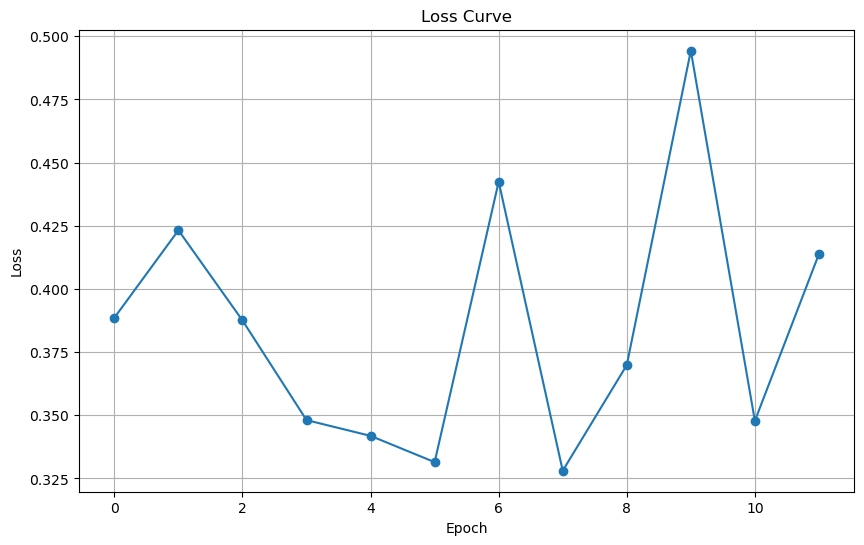

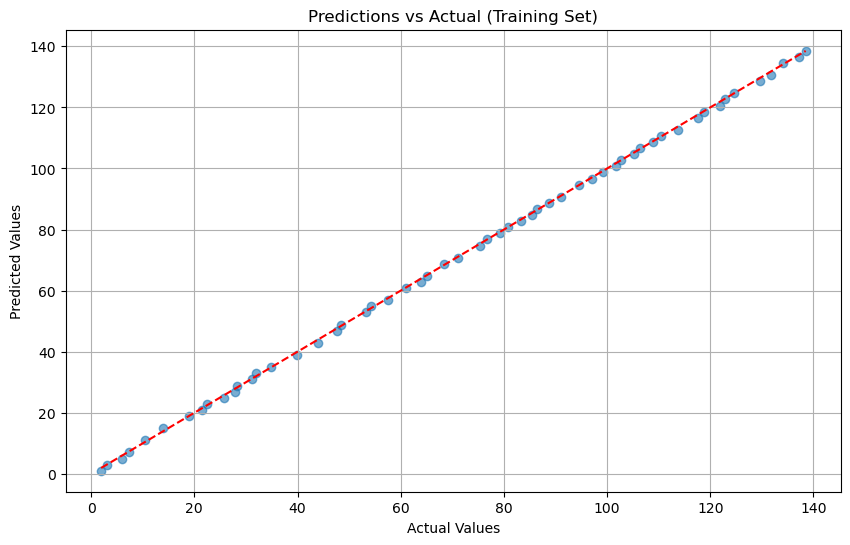

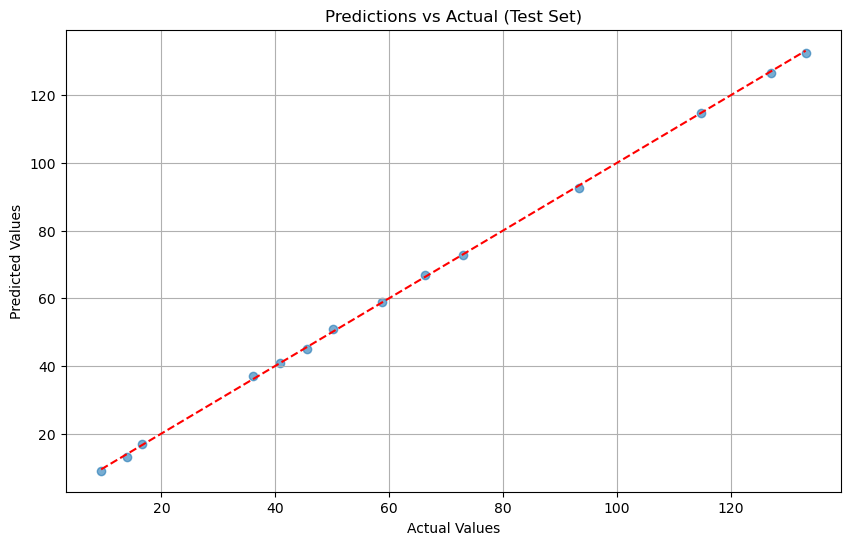

In [446]:
import matplotlib.pyplot as plt

# Loss Curve
def plot_loss_curve(losses):
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(losses)), losses, marker='o', linestyle='-')
    plt.title('Loss Curve')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

# Prediction vs Actual Scatter Plot
def plot_predictions_vs_actual(predictions, actual, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(actual, predictions, alpha=0.6)
    plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()], 'r--')
    plt.title(title)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)
    plt.show()

# Plot the loss curve
plot_loss_curve(final_losses)

# Plot predictions vs actual for training set
plot_predictions_vs_actual(final_predictions_train, Y_train, 'Predictions vs Actual (Training Set)')

# Plot predictions vs actual for test set
plot_predictions_vs_actual(final_predictions_test, Y_test, 'Predictions vs Actual (Test Set)')

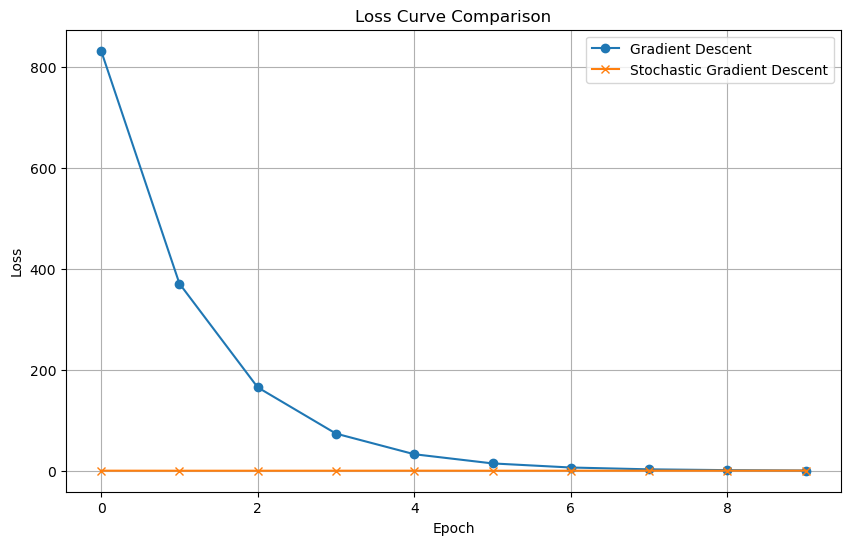

In [447]:
learning_rate = 0.0002
num_epochs = 10

# Run GD
gd_weights, gd_losses = gradient_descent(X_train, Y_train, learning_rate, num_epochs)

# Run SGD
sgd_weights, sgd_losses = stochastic_gradient_descent(X_train, Y_train, learning_rate, num_epochs, batch_size=1)

# Plotting the loss curves
plt.figure(figsize=(10, 6))
plt.plot(range(num_epochs), gd_losses, label='Gradient Descent', marker='o')
plt.plot(range(num_epochs), sgd_losses, label='Stochastic Gradient Descent', marker='x')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()

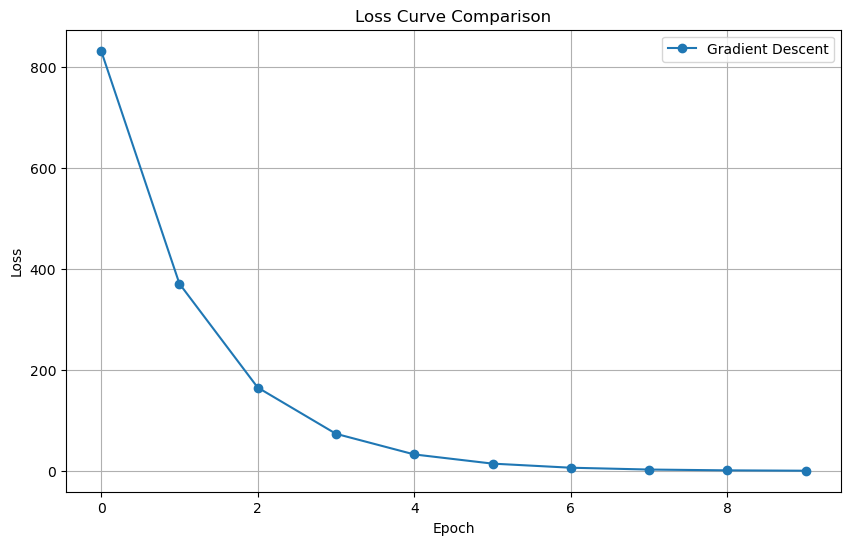

In [448]:
plt.figure(figsize=(10, 6))
plt.plot(range(num_epochs), gd_losses, label='Gradient Descent', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()

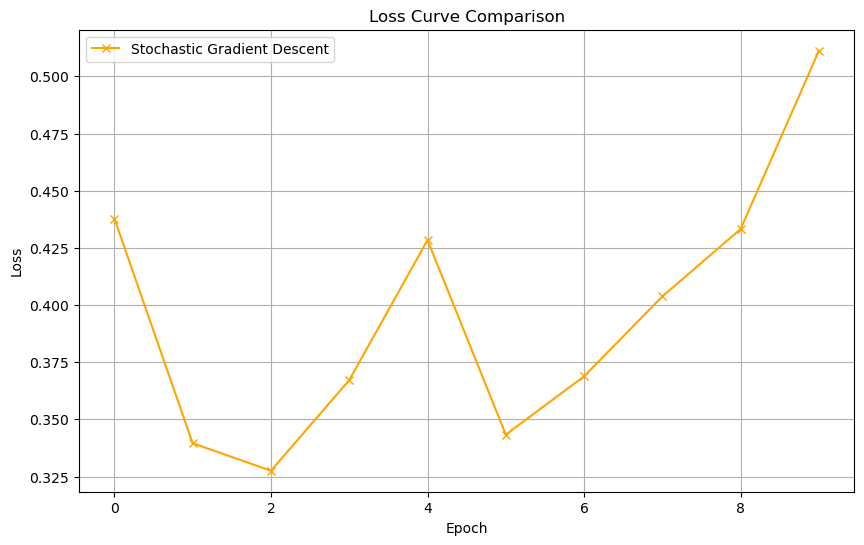

In [449]:
plt.figure(figsize=(10, 6))
plt.plot(range(num_epochs), sgd_losses, label='Stochastic Gradient Descent', marker='x', color = 'orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()